<a href="https://colab.research.google.com/github/mumtazharis/PCVK_MumtazHaris/blob/main/Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [186]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [187]:
img = cv2.imread('/content/drive/MyDrive/PCVK/Images/morphology.png')

In [188]:
def dilasi_cross(image):
     # Jika gambar memiliki tiga saluran (RGB), konversi ke grayscale
    if len(image.shape) == 3:
        gray_image = np.mean(image, axis=2).astype(np.uint8)  # Konversi ke grayscale
    else:
        gray_image = image

    # Mendapatkan ukuran gambar
    height, width = gray_image.shape

    # Membuat salinan gambar untuk hasil dilasi
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Melakukan iterasi melalui setiap piksel
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Mengambil nilai maksimum di sekitar piksel dengan elemen cross 3x3
            max_value = max(
                gray_image[i-1, j],  # atas
                gray_image[i+1, j],  # bawah
                gray_image[i, j-1],  # kiri
                gray_image[i, j+1],  # kanan
                gray_image[i, j]     # tengah
            )
            dilated_image[i, j] = max_value

    return dilated_image

In [189]:
dilasi_manual = dilasi_cross(img)

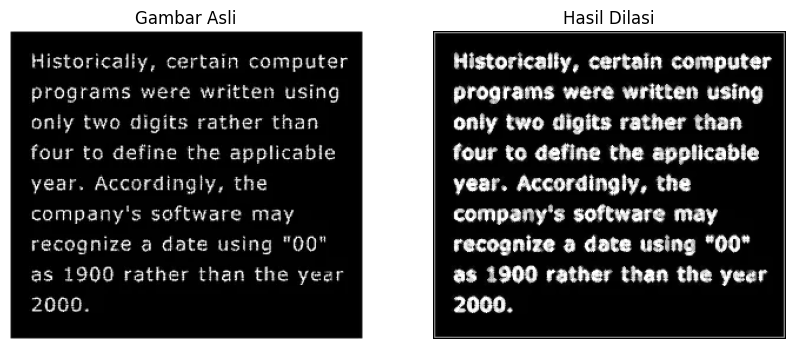

In [190]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Hasil Dilasi')
plt.imshow(dilasi_manual, cmap='gray')


In [191]:
cros3x3_kernel = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
], dtype=np.uint8)

In [192]:
dilasi_cv = cv2.dilate(img, cros3x3_kernel, iterations=1)

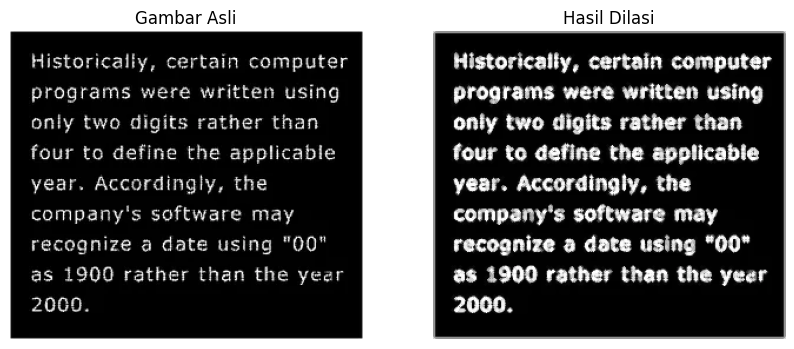

In [193]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Hasil Dilasi')
plt.imshow(dilasi_cv, cmap='gray')


In [194]:
def erosi(image):
    # Jika gambar memiliki tiga saluran (RGB), konversi ke grayscale
    if len(image.shape) == 3:
        gray_image = np.mean(image, axis=2).astype(np.uint8)  # Konversi ke grayscale
    else:
        gray_image = image

    # Mendapatkan ukuran gambar
    height, width = gray_image.shape

    # Membuat salinan gambar untuk hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Melakukan iterasi melalui setiap piksel (mengabaikan tepi)
    for i in range(2, height - 2):
        for j in range(2, width - 2):
            # Mengambil nilai minimum di sekitar piksel dengan elemen square 5x5
            min_value = np.min(gray_image[i-2:i+3, j-2:j+3])
            eroded_image[i, j] = min_value  # Menggunakan minimum dari area 5x5

    return eroded_image

In [195]:
img2 = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')

In [196]:
erosi_manual = erosi(img2)

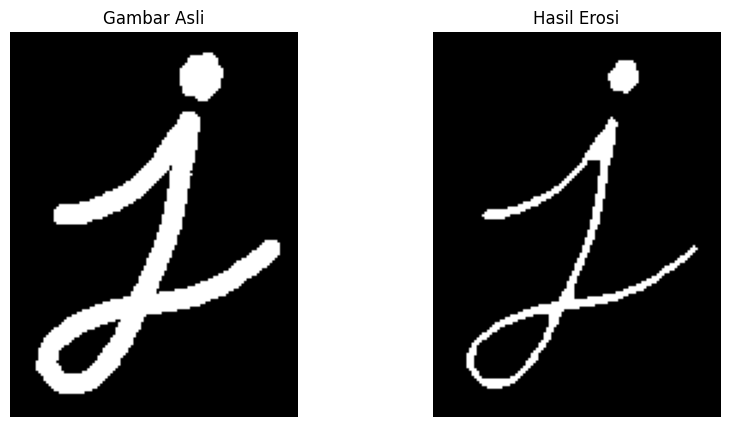

In [197]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img2, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Hasil Erosi')
plt.imshow(erosi_manual, cmap='gray')


In [198]:
kernel_erosi = np.ones((5, 5), np.uint8)

In [199]:
erosi_cv = cv2.erode(img2, kernel_erosi, iterations=1)

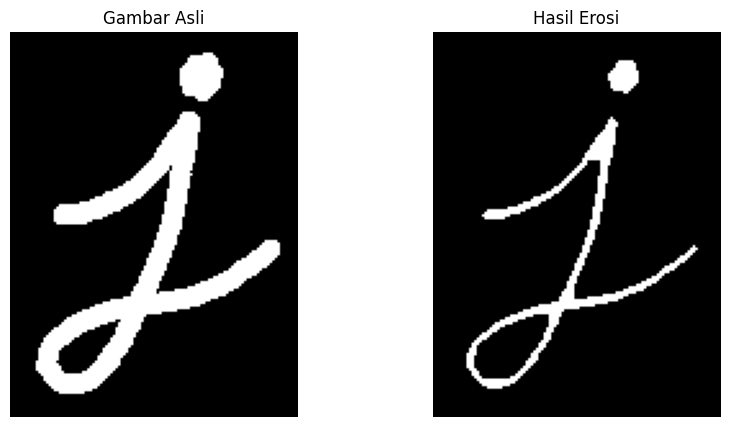

In [200]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img2, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Hasil Erosi')
plt.imshow(erosi_cv, cmap='gray')


# Opening tanpa dan dengan libary

In [201]:
img3 = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png')

## Tanpa library

In [202]:
def erosi_opening(image):
    # Jika gambar memiliki tiga saluran (RGB), konversi ke grayscale
    if len(image.shape) == 3:
        gray_image = np.mean(image, axis=2).astype(np.uint8)  # Konversi ke grayscale
    else:
        gray_image = image

    # Mendapatkan ukuran gambar
    height, width = gray_image.shape

    # Membuat salinan gambar untuk hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Melakukan iterasi melalui setiap piksel (mengabaikan tepi)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Mengambil nilai minimum di sekitar piksel dengan elemen square 3x3
            min_value = np.min(gray_image[i-1:i+2, j-1:j+2])
            eroded_image[i, j] = min_value  # Menggunakan minimum dari area 3x3

    return eroded_image

In [203]:
def dilasi_opening(image):
     # Jika gambar memiliki tiga saluran (RGB), konversi ke grayscale
    if len(image.shape) == 3:
        gray_image = np.mean(image, axis=2).astype(np.uint8)  # Konversi ke grayscale
    else:
        gray_image = image

    # Mendapatkan ukuran gambar
    height, width = gray_image.shape

    # Membuat salinan gambar untuk hasil dilasi
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Melakukan iterasi melalui setiap piksel
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Mengambil nilai maksimum di sekitar piksel dengan elemen cross 3x3
            max_value = np.max(gray_image[i-1:i+2, j-1:j+2])
            dilated_image[i, j] = max_value  # Menggunakan maximum dari area 3x3

    return dilated_image

In [204]:
erosi_opening_manual = erosi_opening(img3)
dilasi_opening_manual = dilasi_opening(erosi_opening_manual)

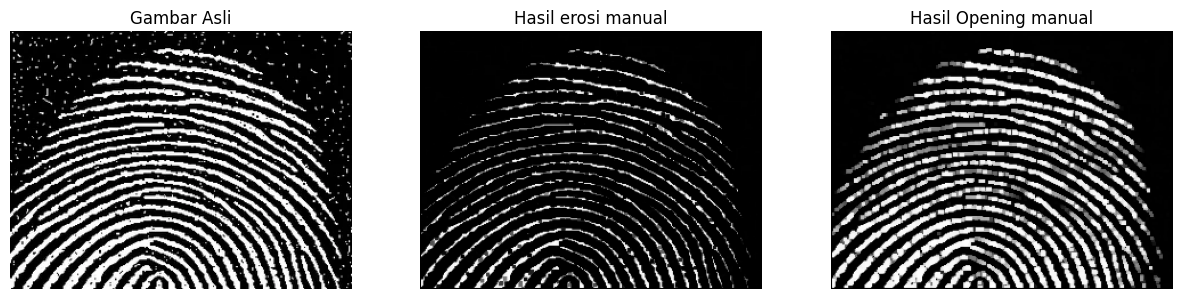

In [205]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img3, cmap='gray')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Hasil erosi manual')
plt.imshow(erosi_opening_manual, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Hasil Opening manual')
plt.imshow(dilasi_opening_manual, cmap='gray')


## Dengan library

In [206]:
kernel_opening = np.ones((3, 3), np.uint8)

In [217]:
opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel_opening)

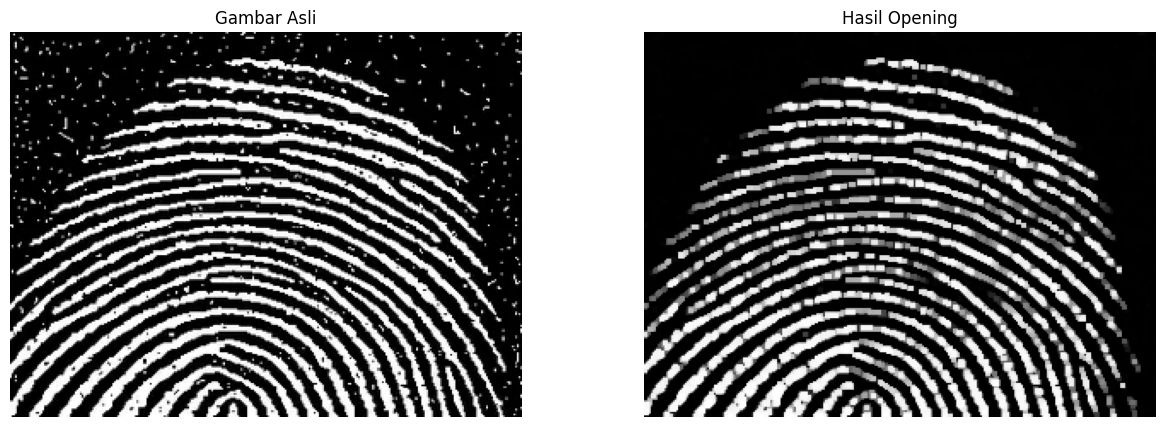

In [220]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img3, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Hasil Opening')
plt.imshow(opening, cmap='gray')


# Closing tanpa dan dengan libary

In [221]:
img4 = cv2.imread('/content/drive/MyDrive/PCVK/Images/fingerprint.png')

## Tanpa library

In [222]:
def dilasi_closing(image):
     # Jika gambar memiliki tiga saluran (RGB), konversi ke grayscale
    if len(image.shape) == 3:
        gray_image = np.mean(image, axis=2).astype(np.uint8)  # Konversi ke grayscale
    else:
        gray_image = image

    # Mendapatkan ukuran gambar
    height, width = gray_image.shape

    # Membuat salinan gambar untuk hasil dilasi
    dilated_image = np.zeros((height, width), dtype=np.uint8)

    # Melakukan iterasi melalui setiap piksel
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Mengambil nilai maksimum di sekitar piksel dengan elemen cross 3x3
            max_value = np.max(gray_image[i-1:i+2, j-1:j+2])
            dilated_image[i, j] = max_value  # Menggunakan maximum dari area 3x3

    return dilated_image

In [223]:
def erosi_closing(image):
    # Jika gambar memiliki tiga saluran (RGB), konversi ke grayscale
    if len(image.shape) == 3:
        gray_image = np.mean(image, axis=2).astype(np.uint8)  # Konversi ke grayscale
    else:
        gray_image = image

    # Mendapatkan ukuran gambar
    height, width = gray_image.shape

    # Membuat salinan gambar untuk hasil erosi
    eroded_image = np.zeros((height, width), dtype=np.uint8)

    # Melakukan iterasi melalui setiap piksel (mengabaikan tepi)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            # Mengambil nilai minimum di sekitar piksel dengan elemen square 3x3
            min_value = np.min(gray_image[i-1:i+2, j-1:j+2])
            eroded_image[i, j] = min_value  # Menggunakan minimum dari area 3x3

    return eroded_image

In [224]:
dilasi_closing_manual = dilasi_closing(img4)
erosi_closing_manual = erosi_closing(dilasi_closing_manual)

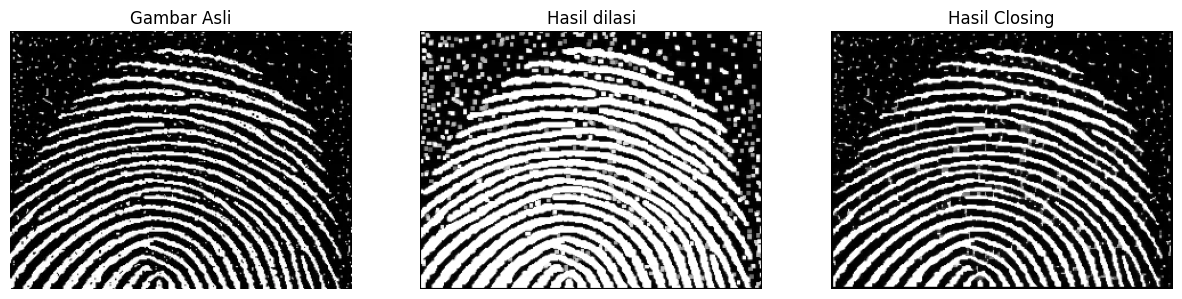

In [225]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img4, cmap='gray')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('Hasil dilasi')
plt.imshow(dilasi_closing_manual, cmap='gray')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('Hasil Closing')
plt.imshow(erosi_closing_manual, cmap='gray')


## Dengan library

In [226]:
kernel_closing = np.ones((3, 3), np.uint8)

In [227]:
closing = cv2.morphologyEx(img4, cv2.MORPH_CLOSE, kernel_closing)

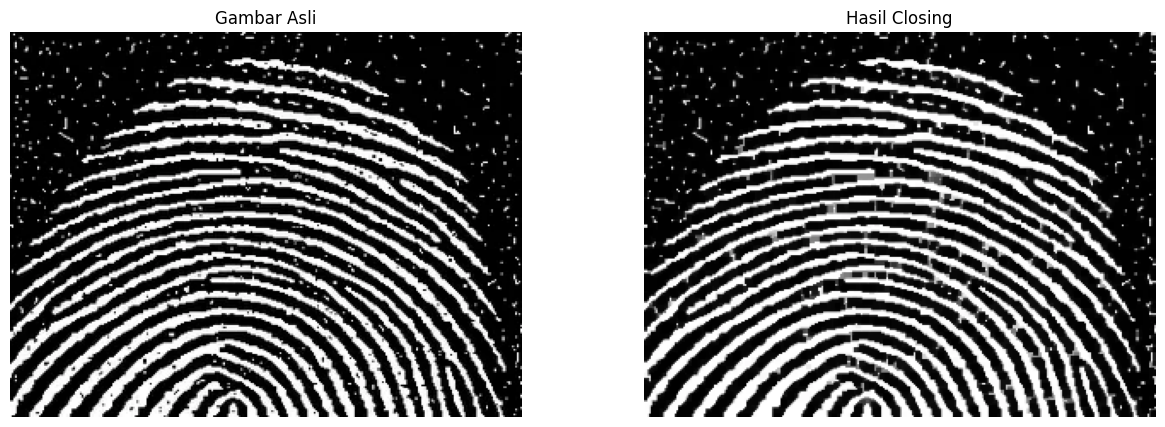

In [228]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img4, cmap='gray')
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Hasil Closing')
plt.imshow(closing, cmap='gray')


In [229]:
img5 = cv2.imread('/content/drive/MyDrive/PCVK/Images/j.png')

In [231]:
SE_cross3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
SE_cross5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

In [232]:
dilasi_cross3x3 = cv2.dilate(img5, SE_cross3x3, iterations=1)
dilasi_cross5x5 = cv2.dilate(img5, SE_cross5x5, iterations=1)

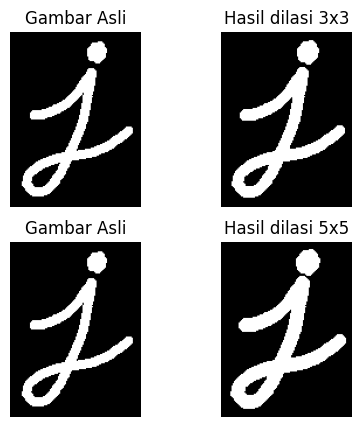

In [235]:
plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img5, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Hasil dilasi 3x3')
plt.imshow(dilasi_cross3x3, cmap='gray')
plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img5, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Hasil dilasi 5x5')
plt.imshow(dilasi_cross5x5, cmap='gray')


In [236]:
SE_circular3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
SE_circular5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

In [237]:
dilasi_circular3x3 = cv2.dilate(img5, SE_circular3x3, iterations=1)
dilasi_circular5x5 = cv2.dilate(img5, SE_circular5x5, iterations=1)

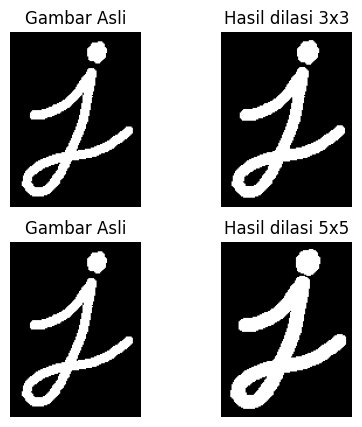

In [238]:
plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img5, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Hasil dilasi 3x3')
plt.imshow(dilasi_circular3x3, cmap='gray')
plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img5, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Hasil dilasi 5x5')
plt.imshow(dilasi_circular5x5, cmap='gray')


In [239]:
SE_rectangular3x5 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
SE_rectangular5x7 = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 7))

In [241]:
erosi_rectangular3x5 = cv2.erode(img5, SE_rectangular3x5, iterations=1)
erosi_rectangular5x7 = cv2.erode(img5, SE_rectangular5x7, iterations=1)

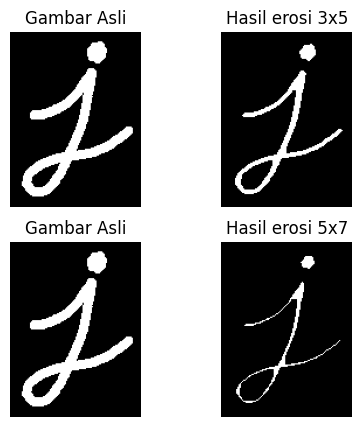

In [242]:
plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img5, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Hasil erosi 3x5')
plt.imshow(erosi_rectangular3x5, cmap='gray')
plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img5, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Hasil erosi 5x7')
plt.imshow(erosi_rectangular5x7, cmap='gray')


In [250]:
SE_vertical3 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
SE_vertical5 = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 5))

In [251]:
erosi_vertical3 = cv2.erode(img5, SE_vertical3, iterations=1)
erosi_vertical5 = cv2.erode(img5, SE_vertical5, iterations=1)

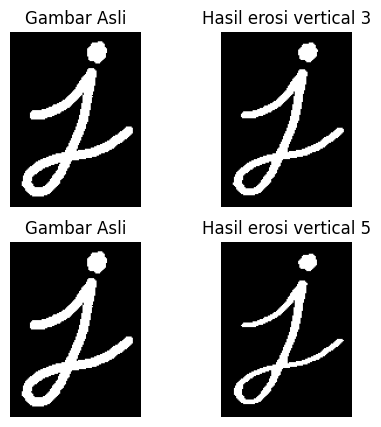

In [253]:
plt.figure(figsize=(5, 5))
plt.subplot(2, 2, 1)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img5, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('Hasil erosi vertical 3')
plt.imshow(erosi_vertical3, cmap='gray')
plt.subplot(2, 2, 3)
plt.axis('off')
plt.title('Gambar Asli')
plt.imshow(img5, cmap='gray')
plt.subplot(2, 2, 4)
plt.axis('off')
plt.title('Hasil erosi vertical 5')
plt.imshow(erosi_vertical5, cmap='gray')
